---
# <CENTER><font color="crimson">UNSUPERVISED LEARNING</font><br><small><b><font color="darkgoldenrod">DENSITY-BASED CLUSTERING (DBSCAN / OPTICS)</font></b></small>
---
<font color="dodgerblue">Prepared by **NICHOLAS DOMINIC**
<br>Guided from *Aurélien Géron*'s **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow** (2nd ed., by O’Reilly Media, Inc.)
<br>Powered by Interactive Python **Jupyter Notebook** (.ipynb), developed with **Python 3.7**

In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from matplotlib import pyplot as plt
import numpy as np

## <font color="crimson">User-defined Function

In [2]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool) # create an array alike dbscan.lables_
    core_mask[dbscan.core_sample_indices_] = True # replace all with True
    anomalies_mask = dbscan.labels_ == -1 # check if dbscan.labels_ has -1 value
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")

    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples))
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14, rotation=0)

## <font color="crimson">Density-based Spatial Clustering of Applications with Noise (DBSCAN) </font>
Documentation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [3]:
x, y = make_moons(n_samples=1000, noise=.05, random_state=42)

In [4]:
# assign four different eps
eps = [.04, .05, .08, .15]

# fit DBSCAN model with different eps
dbscan = []
for i in eps:
    dbscan.append(DBSCAN(eps=i).fit(x))

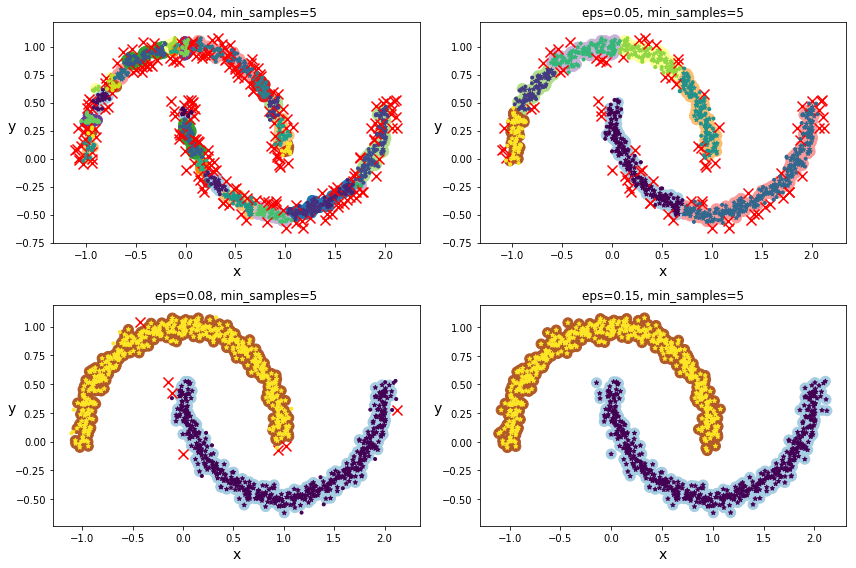

In [5]:
fig = plt.figure(figsize=(12, 8))

for i, dbscan in enumerate(dbscan):
    a = fig.add_subplot(2, 2, i+1) # .add_subplot(row, column, position) where position must starts from 1
    plot_dbscan(dbscan, x, size=100) # plot each DBSCAN Cluster
plt.tight_layout()

## <font color="crimson">Ordering Points to Identify the Clustering Structure (OPTICS)</font>
Documentation of [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html)

In [6]:
# assign four different eps
eps = [.04, .05, .08, .15]

# fit DBSCAN model with different eps
optics = []
for i in eps:
    optics.append(OPTICS(eps=i, min_samples=10).fit(x))

In [7]:
optics

[OPTICS(algorithm='auto', cluster_method='xi', eps=0.04, leaf_size=30,
        max_eps=inf, metric='minkowski', metric_params=None,
        min_cluster_size=None, min_samples=10, n_jobs=None, p=2,
        predecessor_correction=True, xi=0.05),
 OPTICS(algorithm='auto', cluster_method='xi', eps=0.05, leaf_size=30,
        max_eps=inf, metric='minkowski', metric_params=None,
        min_cluster_size=None, min_samples=10, n_jobs=None, p=2,
        predecessor_correction=True, xi=0.05),
 OPTICS(algorithm='auto', cluster_method='xi', eps=0.08, leaf_size=30,
        max_eps=inf, metric='minkowski', metric_params=None,
        min_cluster_size=None, min_samples=10, n_jobs=None, p=2,
        predecessor_correction=True, xi=0.05),
 OPTICS(algorithm='auto', cluster_method='xi', eps=0.15, leaf_size=30,
        max_eps=inf, metric='minkowski', metric_params=None,
        min_cluster_size=None, min_samples=10, n_jobs=None, p=2,
        predecessor_correction=True, xi=0.05)]